# Scaling model plots

In [1]:
from mdx2.utils import loadobj
import matplotlib.pyplot as plt

input_files = [f'../processing/mdx2/split_{j:02}/scales_all.nxs' for j in range(17)]
Models = [{v:loadobj(fn,v,verbose=False) for v in ['scaling_model','offset_model','absorption_model','detector_model']} for fn in input_files]

## Figure 3a, scale column

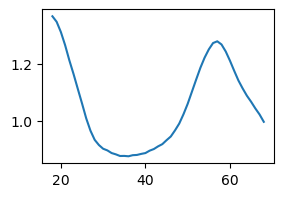

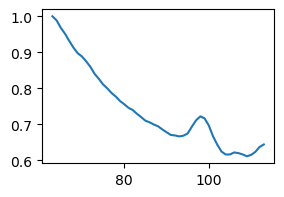

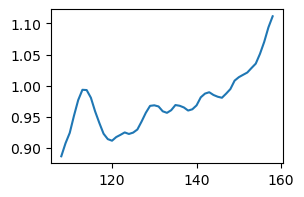

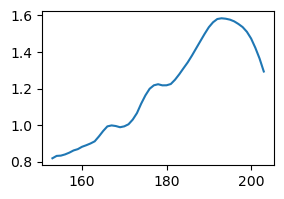

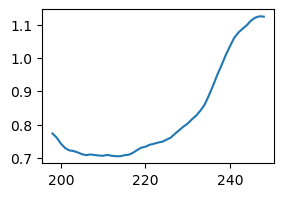

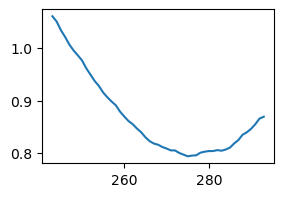

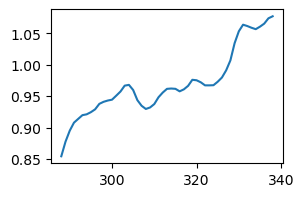

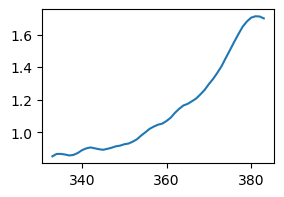

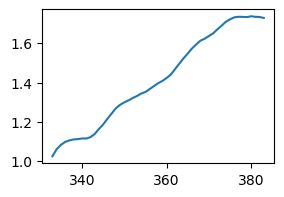

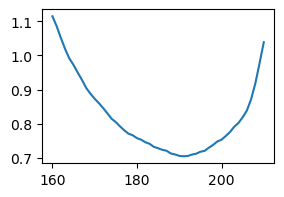

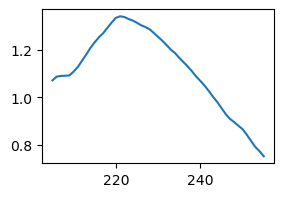

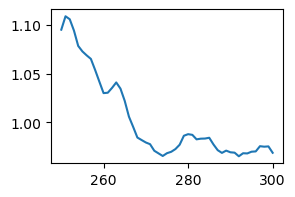

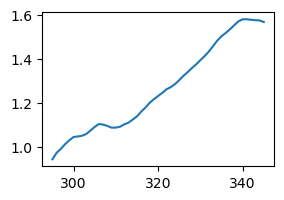

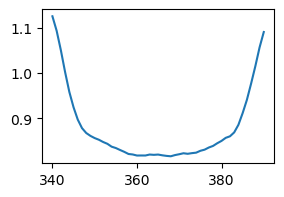

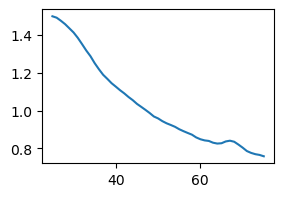

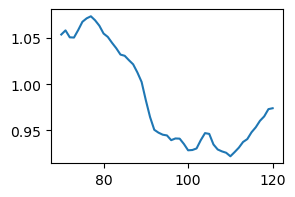

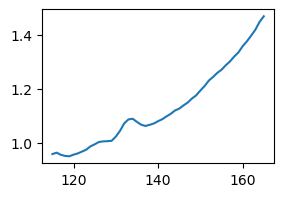

In [2]:
!mkdir -p figures

for j,M in enumerate(Models):
    b = M['scaling_model'].to_xarray()
    b.plot(figsize=(3,2))
    plt.xlabel('')
    if j in [0,1,16]:
        plt.savefig(f'figures/fig3a_{j:02}_scale.png',transparent=True)

## Figure 3a, offset column

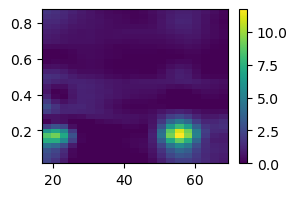

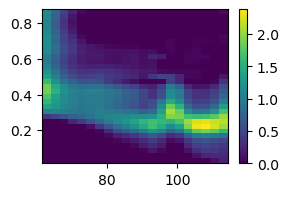

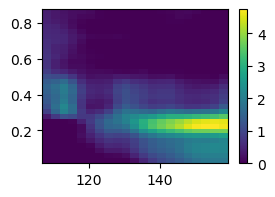

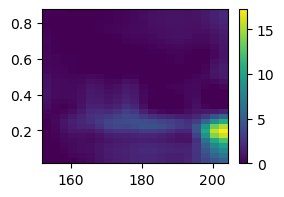

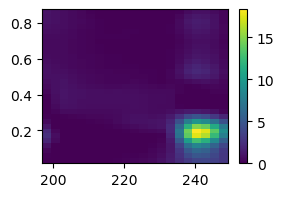

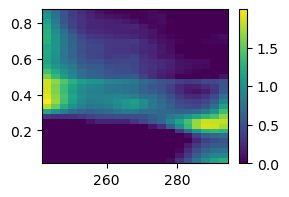

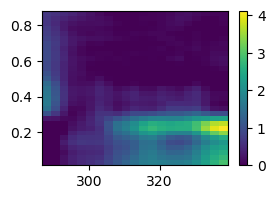

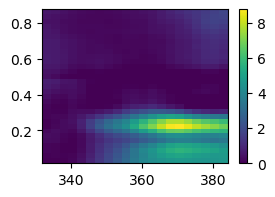

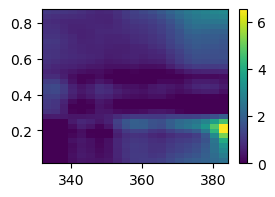

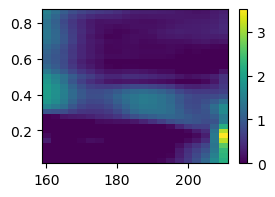

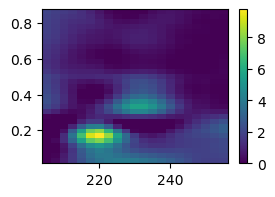

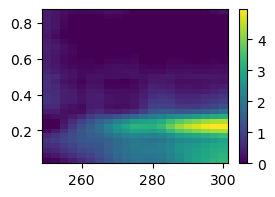

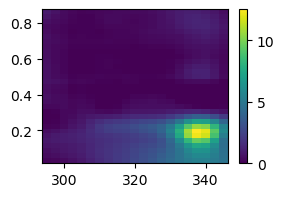

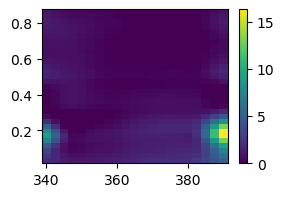

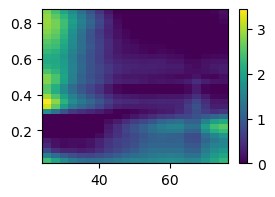

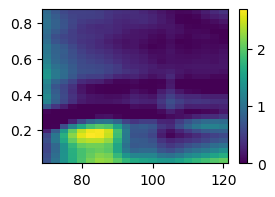

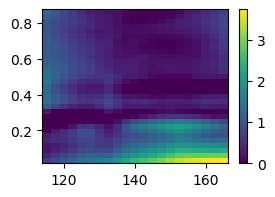

In [3]:
for j,M in enumerate(Models):
    c = M['offset_model'].to_xarray()
    (c*1E-6).plot(figsize=(3,2))
    plt.xlabel('')
    plt.ylabel('')
    if j in [0,1,16]:
        plt.savefig(f'figures/fig3a_{j:02}_offset.png',transparent=True)

## Figure 3a, absorption column

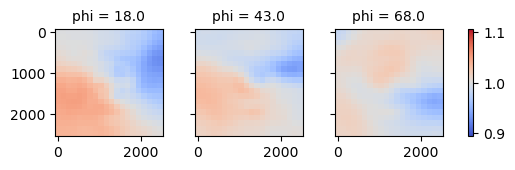

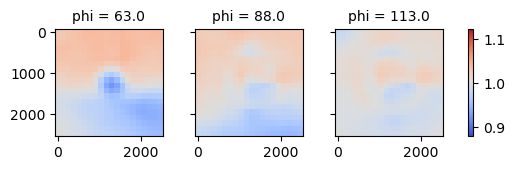

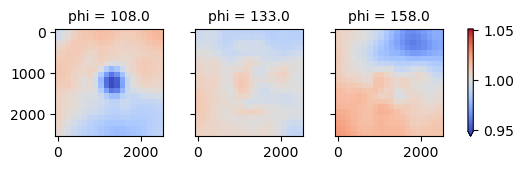

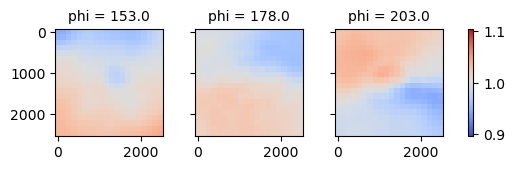

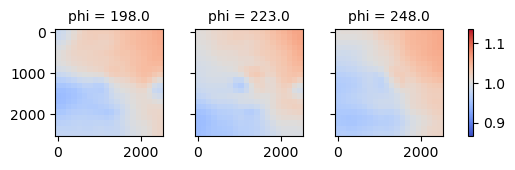

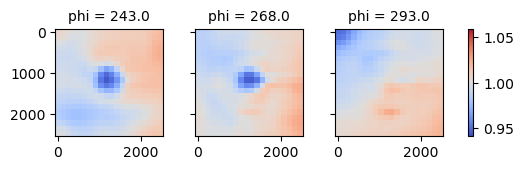

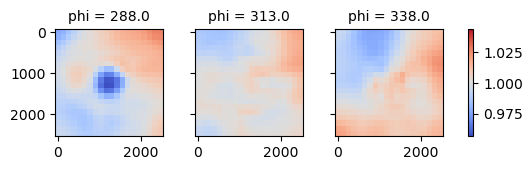

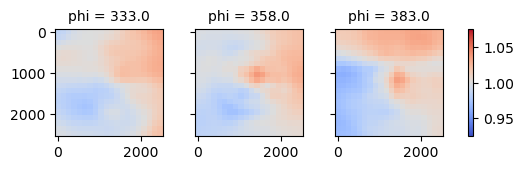

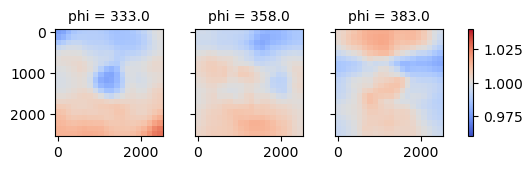

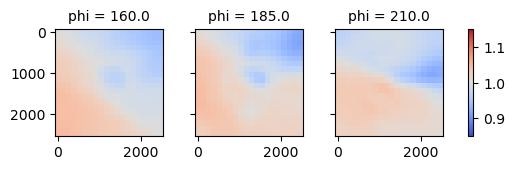

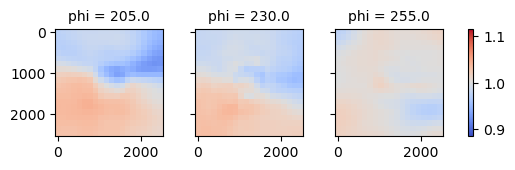

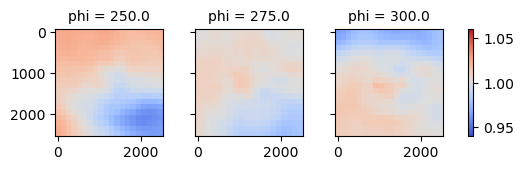

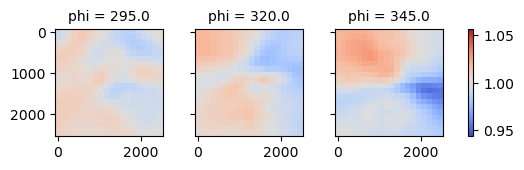

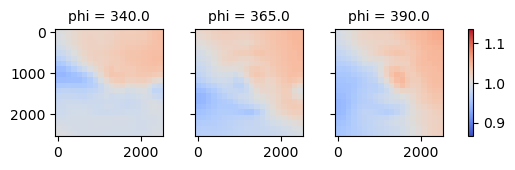

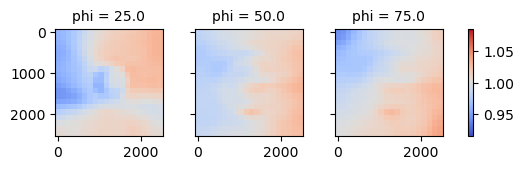

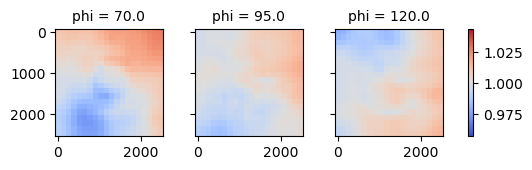

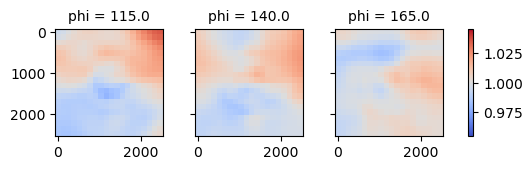

In [4]:
for j,M in enumerate(Models):
    a = M['absorption_model'].to_xarray()
    vr = 5*a.std().data
    fh = a[:,:,::5].plot(yincrease=False,x='ix',y='iy',col='phi',figsize=(6,2),cmap='coolwarm',vmin=1-vr,vmax=1+vr)
    fh.set_xlabels('')
    fh.set_ylabels('')
    [ax.set_aspect('equal') for ax in fh.axs.flatten()]
    if j in [0,1,16]:
        plt.savefig(f'figures/fig3a_{j:02}_absorption.png',transparent=True)

## Figure 3b, detector

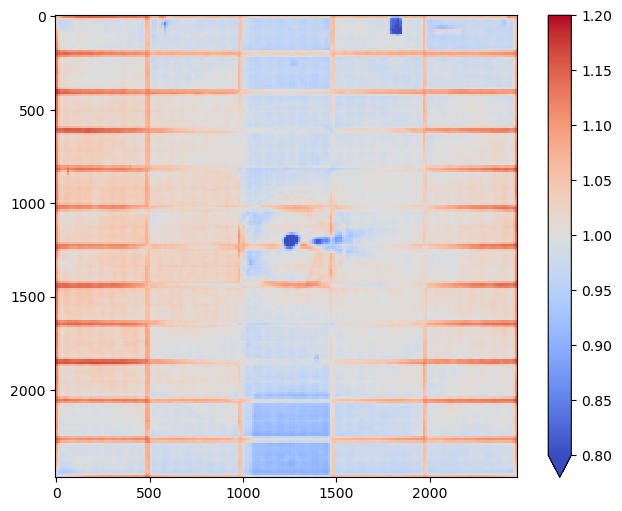

In [5]:
d = Models[0]['detector_model'].to_xarray()
vr = .2
fh = d.plot(yincrease=False,x='ix',y='iy',figsize=(8,6),cmap='coolwarm',vmin=1-vr,vmax=1+vr)
plt.xlabel('')
plt.ylabel('')
plt.gca().set_aspect('equal')
plt.savefig(f'figures/fig3b_detector.png',transparent=True)